# Notes about the Intro to Machine Learning Project
[Marcelo Tyszler](mailto:tyszler.jobs@gmail.com)

26/Sep/2017

In this notebook I summarize my steps and findings towards the Final Project in the Intro to Machine Learning course. This is in the Scope of the Udacity Data Analyst Nanodegree.

# Choice of tools

For this project I opted for:
* Keep basic documentation and notes in the Jupyter Notebook
* Save files in Github
* Use PyCharm as Python environment


# Initial Data Exploration
Initially I want to read all data and obtain initial summary statistics to get a feel of the full data and spot potential problems.

I first load data for all available features. According to the documentation there should be 21 features:

**financial features**: \['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars)

**email features**: \['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)

**POI label**: \[‘poi’] (boolean, represented as integer)

In [1]:
import pickle

enron_data = pickle.load(open("final_project_dataset.pkl", "r"))

In [2]:
print "Number of Persons: " + str(len(enron_data))
print "Features per Persons: " + str(len(enron_data[enron_data.keys()[0]]))

Number of Persons: 146
Features per Persons: 21


Therefore I have 21 features about 146 persons. Let's double check the features.

In [3]:
print "List of Features:"
enron_data[enron_data.keys()[0]].keys()

List of Features:


['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'email_address',
 'from_poi_to_this_person']

This is what I expected according to the documentation

Let's double check the list of persons.

In [4]:
print "List of Persons:"
sorted(enron_data.keys())

List of Persons:


['ALLEN PHILLIP K',
 'BADUM JAMES P',
 'BANNANTINE JAMES M',
 'BAXTER JOHN C',
 'BAY FRANKLIN R',
 'BAZELIDES PHILIP J',
 'BECK SALLY W',
 'BELDEN TIMOTHY N',
 'BELFER ROBERT',
 'BERBERIAN DAVID',
 'BERGSIEKER RICHARD P',
 'BHATNAGAR SANJAY',
 'BIBI PHILIPPE A',
 'BLACHMAN JEREMY M',
 'BLAKE JR. NORMAN P',
 'BOWEN JR RAYMOND M',
 'BROWN MICHAEL',
 'BUCHANAN HAROLD G',
 'BUTTS ROBERT H',
 'BUY RICHARD B',
 'CALGER CHRISTOPHER F',
 'CARTER REBECCA C',
 'CAUSEY RICHARD A',
 'CHAN RONNIE',
 'CHRISTODOULOU DIOMEDES',
 'CLINE KENNETH W',
 'COLWELL WESLEY',
 'CORDES WILLIAM R',
 'COX DAVID',
 'CUMBERLAND MICHAEL S',
 'DEFFNER JOSEPH M',
 'DELAINEY DAVID W',
 'DERRICK JR. JAMES V',
 'DETMERING TIMOTHY J',
 'DIETRICH JANET R',
 'DIMICHELE RICHARD G',
 'DODSON KEITH',
 'DONAHUE JR JEFFREY M',
 'DUNCAN JOHN H',
 'DURAN WILLIAM D',
 'ECHOLS JOHN B',
 'ELLIOTT STEVEN',
 'FALLON JAMES B',
 'FASTOW ANDREW S',
 'FITZGERALD JAY L',
 'FOWLER PEGGY',
 'FOY JOE',
 'FREVERT MARK A',
 'FUGH JOHN L',
 'GAHN 

I spot 2 instances that need to be removed:  *TOTAL* and *THE TRAVEL AGENCY IN THE PARK*.

In [5]:
enron_data.pop('TOTAL',0)
enron_data.pop('THE TRAVEL AGENCY IN THE PARK',0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

Let's see how many POIs and non-POIs are in the dataset

In [6]:
POI = 0
non_POI = 0
for person in enron_data.keys():
    if enron_data[person]['poi']:
        print person
        POI +=1
    else:
        non_POI +=1
print "\n"
print "POIs:" + str(POI)
print "non-POIs:" + str(non_POI)
print "Total:" + str(POI+non_POI)

HANNON KEVIN P
COLWELL WESLEY
RIEKER PAULA H
KOPPER MICHAEL J
SHELBY REX
DELAINEY DAVID W
LAY KENNETH L
BOWEN JR RAYMOND M
BELDEN TIMOTHY N
FASTOW ANDREW S
CALGER CHRISTOPHER F
RICE KENNETH D
SKILLING JEFFREY K
YEAGER F SCOTT
HIRKO JOSEPH
KOENIG MARK E
CAUSEY RICHARD A
GLISAN JR BEN F


POIs:18
non-POIs:126
Total:144


Lets get a feel for the data and print the data for some people

In [7]:
test_keys = range(0,5)

for key in test_keys:
    print enron_data.keys()[key]
    print(enron_data[enron_data.keys()[key]])


METTS MARK
{'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}
BAXTER JOHN C
{'salary': 267102, 'to_messages': 'NaN', 'deferral_payments': 1295738, 'total_payments': 5634343, 'exercised_stock_options': 6680544, 'bonus': 1200000, 'restricted_stock': 3942714, 'shared_receipt_with_poi': 'NaN', 'restricted_stock_deferred': 'NaN', 'total_stock_value': 10623258, 'expenses': 11200, 'loan_advances': 'NaN', 'from_messages': 'NaN', 'other': 2660303, 'from_this_person_to_poi': 'NaN', 'poi': False, 'director_fees'

To get an even better look, I'll covert the data into a panda dataframe, and re-order the columns to match the pdf file.

In [8]:
import pandas as pd
# Formatting for the output:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Convert dictionary to DataFrame
enron_data_df = pd.DataFrame.from_dict(enron_data, orient = 'index', dtype = float)

# re-order columns
enron_data_df = enron_data_df[
['salary',
'bonus',
'long_term_incentive',
'deferred_income',
'deferral_payments',
'loan_advances',
'other',
'expenses',
'director_fees',
'total_payments',
 'exercised_stock_options',
'restricted_stock',
 'restricted_stock_deferred',
 'total_stock_value',
 'email_address',
 'to_messages',
 'shared_receipt_with_poi',
 'from_messages',
 'from_this_person_to_poi',
 'poi',
 'from_poi_to_this_person']]

Print some rows

In [9]:
enron_data_df.head(20)

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,...,restricted_stock,restricted_stock_deferred,total_stock_value,email_address,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,from_poi_to_this_person
ALLEN PHILLIP K,201955.000,4175000.000,304805.000,-3081055.000,2869717.000,nan,152.000,13868.000,nan,4484442.000,...,126027.000,-126027.000,1729541.000,phillip.allen@enron.com,2902.000,1407.000,2195.000,65.000,0.000,47.000
BADUM JAMES P,nan,nan,nan,nan,178980.000,nan,nan,3486.000,nan,182466.000,...,nan,nan,257817.000,NaN,nan,nan,nan,nan,0.000,nan
BANNANTINE JAMES M,477.000,nan,nan,-5104.000,nan,nan,864523.000,56301.000,nan,916197.000,...,1757552.000,-560222.000,5243487.000,james.bannantine@enron.com,566.000,465.000,29.000,0.000,0.000,39.000
BAXTER JOHN C,267102.000,1200000.000,1586055.000,-1386055.000,1295738.000,nan,2660303.000,11200.000,nan,5634343.000,...,3942714.000,nan,10623258.000,NaN,nan,nan,nan,nan,0.000,nan
BAY FRANKLIN R,239671.000,400000.000,nan,-201641.000,260455.000,nan,69.000,129142.000,nan,827696.000,...,145796.000,-82782.000,63014.000,frank.bay@enron.com,nan,nan,nan,nan,0.000,nan
BAZELIDES PHILIP J,80818.000,nan,93750.000,nan,684694.000,nan,874.000,nan,nan,860136.000,...,nan,nan,1599641.000,NaN,nan,nan,nan,nan,0.000,nan
BECK SALLY W,231330.000,700000.000,nan,nan,nan,nan,566.000,37172.000,nan,969068.000,...,126027.000,nan,126027.000,sally.beck@enron.com,7315.000,2639.000,4343.000,386.000,0.000,144.000
BELDEN TIMOTHY N,213999.000,5249999.000,nan,-2334434.000,2144013.000,nan,210698.000,17355.000,nan,5501630.000,...,157569.000,nan,1110705.000,tim.belden@enron.com,7991.000,5521.000,484.000,108.000,1.000,228.000
BELFER ROBERT,nan,nan,nan,nan,-102500.000,nan,nan,nan,3285.000,102500.000,...,nan,44093.000,-44093.000,NaN,nan,nan,nan,nan,0.000,nan
BERBERIAN DAVID,216582.000,nan,nan,nan,nan,nan,nan,11892.000,nan,228474.000,...,869220.000,nan,2493616.000,david.berberian@enron.com,nan,nan,nan,nan,0.000,nan


and summary statistics

In [10]:
enron_data_df.describe()

C:\Users\marcelot\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,from_poi_to_this_person
count,94.000,81.000,65.000,48.000,38.000,3.000,91.000,94.000,16.000,123.000,101.000,109.000,17.000,125.000,86.000,86.000,86.000,86.000,144.000,86.000
mean,284087.543,1201773.074,746491.200,-581049.812,841602.526,27975000.000,466410.516,54192.011,89822.875,2641805.935,2959559.257,1147424.092,621892.824,3352073.024,2073.860,1176.465,608.791,41.233,0.125,64.895
std,177131.115,1441679.438,862917.422,942076.403,1289322.626,46382560.031,1397375.608,46108.377,41112.701,9524693.906,5499449.599,2249770.357,3845528.350,6532883.097,2582.701,1178.318,1841.034,100.073,0.332,86.979
min,477.000,70000.000,69223.000,-3504386.000,-102500.000,400000.000,2.000,148.000,3285.000,148.000,3285.000,-2604490.000,-1787380.000,-44093.000,57.000,2.000,12.000,0.000,0.000,0.000
25%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,nan
50%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,nan
75%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000,nan
max,1111258.000,8000000.000,5145434.000,-833.000,6426990.000,81525000.000,10359729.000,228763.000,137864.000,103559793.000,34348384.000,14761694.000,15456290.000,49110078.000,15149.000,5521.000,14368.000,609.000,1.000,528.000


Let's convert all NaN to 0 to see the data better

In [11]:
enron_data_df = enron_data_df.fillna(0)
enron_data_df.describe()

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,from_poi_to_this_person
count,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000
mean,185446.035,675997.354,336957.833,-193683.271,222089.556,582812.500,294745.535,35375.340,9980.319,2256542.569,2075801.979,868536.292,73417.903,2909785.611,1238.556,702.611,363.583,24.625,0.125,38.757
std,197042.124,1233155.256,687182.568,606011.135,754101.303,6794471.779,1131325.453,45309.303,31300.575,8847188.787,4795513.145,2016572.389,1301983.390,6189018.075,2237.565,1077.291,1450.675,79.778,0.332,74.277
min,0.000,0.000,0.000,-3504386.000,-102500.000,0.000,0.000,0.000,0.000,0.000,0.000,-2604490.000,-1787380.000,-44093.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,-37086.000,0.000,0.000,0.000,0.000,0.000,90192.750,0.000,24345.000,0.000,244326.500,0.000,0.000,0.000,0.000,0.000,0.000
50%,210596.000,300000.000,0.000,0.000,0.000,0.000,919.000,20182.000,0.000,941359.500,608293.500,360528.000,0.000,965955.000,347.500,114.000,17.500,0.000,0.000,4.000
75%,269667.500,800000.000,374586.250,0.000,8535.500,0.000,148577.000,53328.250,0.000,1945668.250,1683580.250,737456.000,0.000,2295175.750,1623.000,933.750,53.000,14.000,0.000,41.250
max,1111258.000,8000000.000,5145434.000,0.000,6426990.000,81525000.000,10359729.000,228763.000,137864.000,103559793.000,34348384.000,14761694.000,15456290.000,49110078.000,15149.000,5521.000,14368.000,609.000,1.000,528.000


One thing that gets my attention is that *deferral_payments* has negative values, which should not be the case.

Let's see who has this problem:

In [12]:
for person in enron_data.keys():
    if enron_data[person]['deferral_payments']<0:
        print person

BELFER ROBERT


Let's see the full data from this person:

In [13]:
enron_data_df.loc['BELFER ROBERT']

salary                            0.000
bonus                             0.000
long_term_incentive               0.000
deferred_income                   0.000
deferral_payments           -102500.000
loan_advances                     0.000
other                             0.000
expenses                          0.000
director_fees                  3285.000
total_payments               102500.000
exercised_stock_options        3285.000
restricted_stock                  0.000
restricted_stock_deferred     44093.000
total_stock_value            -44093.000
email_address                       NaN
to_messages                       0.000
shared_receipt_with_poi           0.000
from_messages                     0.000
from_this_person_to_poi           0.000
poi                               0.000
from_poi_to_this_person           0.000
Name: BELFER ROBERT, dtype: object

By comparing with the PDF, I notice that the financial data is imported wrongly, with a shift in financial columns. You can see that *total_payments* should be 3285, but is listed as 102500, which is the value of the expenses...

Before fixing it, I'll check if this happens more often. A way to check is re-create the *total_payments* by adding the other columns.

In [14]:
enron_data_df['compute_total_payment'] = \
enron_data_df['salary'] + \
enron_data_df['bonus'] + \
enron_data_df['long_term_incentive'] + \
enron_data_df['deferred_income'] + \
enron_data_df['deferral_payments'] + \
enron_data_df['loan_advances'] + \
enron_data_df['other'] +  \
enron_data_df['expenses'] + \
enron_data_df['director_fees'] 

enron_data_df['compute_total_stock'] = \
enron_data_df['exercised_stock_options'] + \
enron_data_df['restricted_stock'] + \
enron_data_df['restricted_stock_deferred'] 


enron_data_df['check_total_payment'] = enron_data_df['compute_total_payment'] == enron_data_df['total_payments']
enron_data_df['check_total_stock'] = enron_data_df['compute_total_stock'] == enron_data_df['total_stock_value']


In [15]:
enron_data_df[enron_data_df['check_total_payment']==0]

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,...,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,from_poi_to_this_person,compute_total_payment,compute_total_stock,check_total_payment,check_total_stock
BELFER ROBERT,0.000,0.000,0.000,0.000,-102500.000,0.000,0.000,0.000,3285.000,102500.000,...,0.000,0.000,0.000,0.000,0.000,0.000,-99215.000,47378.000,False,False
BHATNAGAR SANJAY,0.000,0.000,0.000,0.000,0.000,0.000,137864.000,0.000,137864.000,15456290.000,...,523.000,463.000,29.000,1.000,0.000,0.000,275728.000,15456290.000,False,False


In [16]:
enron_data_df[enron_data_df['check_total_stock']==0]

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,...,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,from_poi_to_this_person,compute_total_payment,compute_total_stock,check_total_payment,check_total_stock
BELFER ROBERT,0.000,0.000,0.000,0.000,-102500.000,0.000,0.000,0.000,3285.000,102500.000,...,0.000,0.000,0.000,0.000,0.000,0.000,-99215.000,47378.000,False,False
BHATNAGAR SANJAY,0.000,0.000,0.000,0.000,0.000,0.000,137864.000,0.000,137864.000,15456290.000,...,523.000,463.000,29.000,1.000,0.000,0.000,275728.000,15456290.000,False,False


Therefore, besides *BELFER ROBERT* I see the problem also with *BHATNAGAR SANJAY*.

Let's print the full data for this person also.

In [17]:
enron_data_df.loc['BHATNAGAR SANJAY']

salary                                            0.000
bonus                                             0.000
long_term_incentive                               0.000
deferred_income                                   0.000
deferral_payments                                 0.000
loan_advances                                     0.000
other                                        137864.000
expenses                                          0.000
director_fees                                137864.000
total_payments                             15456290.000
exercised_stock_options                     2604490.000
restricted_stock                           -2604490.000
restricted_stock_deferred                  15456290.000
total_stock_value                                 0.000
email_address                sanjay.bhatnagar@enron.com
to_messages                                     523.000
shared_receipt_with_poi                         463.000
from_messages                                   

Both cases have a shift in the financial columns. Let's fix this manually in the data dictionary.

In [18]:
enron_data['BHATNAGAR SANJAY'] = {'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'sanjay.bhatnagar@enron.com',
 'exercised_stock_options': 15456290,
 'expenses': 137864,
 'from_messages': 29,
 'from_poi_to_this_person': 0,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 2604490,
 'restricted_stock_deferred': -2604490,
 'salary': 'NaN',
 'shared_receipt_with_poi': 463,
 'to_messages': 523,
 'total_payments': 137864,
 'total_stock_value': 15456290}

In [19]:
enron_data['BELFER ROBERT'] ={'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': -102500,
 'director_fees': 102500 ,
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN' ,
 'expenses': 3285,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 44093,
 'restricted_stock_deferred': -44093,
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 3285,
 'total_stock_value': 'NaN'}

Let's re-import and double check.

In [20]:
# Convert dictionary to DataFrame
enron_data_df = pd.DataFrame.from_dict(enron_data, orient = 'index', dtype = float)

# re-order columns
enron_data_df = enron_data_df[
['salary',
'bonus',
'long_term_incentive',
'deferred_income',
'deferral_payments',
'loan_advances',
'other',
'expenses',
'director_fees',
'total_payments',
 'exercised_stock_options',
'restricted_stock',
 'restricted_stock_deferred',
 'total_stock_value',
 'email_address',
 'to_messages',
 'shared_receipt_with_poi',
 'from_messages',
 'from_this_person_to_poi',
 'poi',
 'from_poi_to_this_person']]

In [21]:
enron_data_df = enron_data_df.fillna(0)
enron_data_df.describe()

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,from_poi_to_this_person
count,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000,144.000
mean,185446.035,675997.354,336957.833,-194395.076,222801.361,582812.500,293788.146,36355.542,9711.924,2149475.618,2165027.778,905015.965,-52616.583,3017427.160,1238.556,702.611,363.583,24.625,0.125,38.757
std,197042.124,1233155.256,687182.568,605842.222,753841.107,6794471.779,1131517.461,45990.417,30422.535,8779364.388,4923320.048,2000356.656,273183.474,6271527.950,2237.565,1077.291,1450.675,79.778,0.332,74.277
min,0.000,0.000,0.000,-3504386.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-2604490.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,-39072.000,0.000,0.000,0.000,0.000,0.000,87471.500,0.000,44093.000,0.000,256376.500,0.000,0.000,0.000,0.000,0.000,0.000
50%,210596.000,300000.000,0.000,0.000,0.000,0.000,882.500,21937.000,0.000,913825.000,608293.500,361978.000,0.000,980534.500,347.500,114.000,17.500,0.000,0.000,4.000
75%,269667.500,800000.000,374586.250,0.000,8535.500,0.000,148577.000,54234.500,0.000,1885158.250,1683580.250,857103.000,0.000,2372703.250,1623.000,933.750,53.000,14.000,0.000,41.250
max,1111258.000,8000000.000,5145434.000,0.000,6426990.000,81525000.000,10359729.000,228763.000,125034.000,103559793.000,34348384.000,14761694.000,0.000,49110078.000,15149.000,5521.000,14368.000,609.000,1.000,528.000


In [22]:
enron_data_df['compute_total_payment'] = \
enron_data_df['salary'] + \
enron_data_df['bonus'] + \
enron_data_df['long_term_incentive'] + \
enron_data_df['deferred_income'] + \
enron_data_df['deferral_payments'] + \
enron_data_df['loan_advances'] + \
enron_data_df['other'] +  \
enron_data_df['expenses'] + \
enron_data_df['director_fees'] 

enron_data_df['compute_total_stock'] = \
enron_data_df['exercised_stock_options'] + \
enron_data_df['restricted_stock'] + \
enron_data_df['restricted_stock_deferred'] 


enron_data_df['check_total_payment'] = enron_data_df['compute_total_payment'] == enron_data_df['total_payments']
enron_data_df['check_total_stock'] = enron_data_df['compute_total_stock'] == enron_data_df['total_stock_value']

In [23]:
enron_data_df[enron_data_df['check_total_payment']==0]

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,...,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,from_poi_to_this_person,compute_total_payment,compute_total_stock,check_total_payment,check_total_stock


In [24]:
enron_data_df[enron_data_df['check_total_stock']==0]

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,...,to_messages,shared_receipt_with_poi,from_messages,from_this_person_to_poi,poi,from_poi_to_this_person,compute_total_payment,compute_total_stock,check_total_payment,check_total_stock


The problem with shift is solved and all data points are at least internally consistent.

### Value outliers

Now I'll check variable by variable which values fall too far from the median. 

I'll ignore the 0s, in order to spot outliers more easily

In this code I go through each colum and find the persons with values outside the extended IQR, as per John Tukey's method. I used a very conservative factor of 2 to spot the extreme outliers.

I count how often a person shows up as an outlier, and print this list below.

In [25]:
problem_persons = dict()

cases = 0
for column_name in list(enron_data_df):
    if enron_data_df[column_name].dtype == 'float' and column_name != 'poi':
        cases +=1
        test_data = enron_data_df[enron_data_df[column_name]!=0]
        Q1 = test_data[column_name].quantile(0.25)
        Q3 = test_data[column_name].quantile(0.75)
        IQR = Q3 - Q1

        # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
        query_str = '(@Q1 - 2 * @IQR) >= ' + column_name + ' or  (@Q3 + 2 * @IQR) <=' + column_name
        filtered = test_data.query(query_str)

        print column_name + ": " + str(len(filtered))
        filtered = filtered.sort_values(column_name)
        print filtered[column_name].head(10)
        print ""
        
        for person in filtered.index.tolist():
            try:
               problem_persons[person] = 1 + problem_persons[person]
            except:
               problem_persons[person] = 1 

print "Total Cases:" + str(cases)
            

salary: 7
BANNANTINE JAMES M       477.000
GRAY RODNEY             6615.000
WHALLEY LAWRENCE G    510364.000
PICKERING MARK R      655037.000
FREVERT MARK A       1060932.000
LAY KENNETH L        1072321.000
SKILLING JEFFREY K   1111258.000
Name: salary, dtype: float64

bonus: 8
DELAINEY DAVID W     3000000.000
WHALLEY LAWRENCE G   3000000.000
KITCHEN LOUISE       3100000.000
ALLEN PHILLIP K      4175000.000
BELDEN TIMOTHY N     5249999.000
SKILLING JEFFREY K   5600000.000
LAY KENNETH L        7000000.000
LAVORATO JOHN J      8000000.000
Name: bonus, dtype: float64

long_term_incentive: 4
LAVORATO JOHN J   2035380.000
ECHOLS JOHN B     2234774.000
LAY KENNETH L     3600000.000
MARTIN AMANDA K   5145434.000
Name: long_term_incentive, dtype: float64

deferred_income: 5
RICE KENNETH D     -3504386.000
FREVERT MARK A     -3367011.000
HANNON KEVIN P     -3117011.000
ALLEN PHILLIP K    -3081055.000
BELDEN TIMOTHY N   -2334434.000
Name: deferred_income, dtype: float64

deferral_payments: 4
AL

In [26]:
problem_persons_df = pd.DataFrame.from_dict(problem_persons, orient = 'index', dtype = int)
problem_persons_df.columns = ['Count']
problem_persons_df = problem_persons_df.sort_values('Count', ascending = False)
problem_persons_df.head(20)

,Count
FREVERT MARK A,11
LAY KENNETH L,10
BELDEN TIMOTHY N,8
SKILLING JEFFREY K,8
LAVORATO JOHN J,8
BAXTER JOHN C,7
DERRICK JR. JAMES V,5
KITCHEN LOUISE,5
PAI LOU L,5
BHATNAGAR SANJAY,5


As expected *LAY KENNETH L* and *SKILLING JEFFREY K* show up at the top of the list. However, a few new names are also there: *FREVERT MARK A*, *BELDEN TIMOTHY N*, *LAVORATO JOHN J*.

In particular, *FREVERT MARK A* seems to be a strong outlier since it shows up in 11 cases. However, it seems like real outliers, so I will keep them 


## Iniitial Feature Selection

From the small sample above I notice that certain features contain many *NaN* values. In order to access the usability of certain features, I should check how many *NaN* exist, and in particular, what is the breakdown between POI and non-POI to have a sense of the bias that certain features might bring.

I'll also use the opportunity to create lists of features to be used later.

In [27]:
initial_selection_features = ['poi']
all_features = ['poi']

for feature in enron_data[enron_data.keys()[0]].keys():
    nan_poi = 0
    nan_non_poi = 0
    valid_data = 0 
    print "\n"+feature
    for person in enron_data.keys():
        if enron_data[person][feature] =='NaN':
            if enron_data[person]['poi']:
                nan_poi +=1
            else:
                nan_non_poi +=1
        else:
            valid_data +=1
    print "NaN in POIs: " + str(nan_poi) + " (" + str(round(float(nan_poi)/float(POI)*100,2))+"%)"
    print "NaN in non-POIs: " + str(nan_non_poi) + " (" + str(round(float(nan_non_poi)/float(non_POI)*100,2))+"%)"
    print "Valid: " + str(valid_data)  +" (" + str(round(float(valid_data)/float(POI+non_POI)*100,2))+"%)"
    #print "Total:" + str(valid_data+nan_poi+nan_non_poi)
    
    # Keep feature only if at least 50% is valid:
    if round(float(valid_data)/float(POI+non_POI)*100,2)>50:
        # ignore email_address, since it is just text, and poi, which must be first
        if feature !="email_address" and feature !="poi":
            initial_selection_features.append(feature)
            
    # save all features to allow for comparison:
    # ignore email_address, since it is just text, and poi, which must be first
    if feature !="email_address" and feature !="poi":
        all_features.append(feature)
    


salary
NaN in POIs: 1 (5.56%)
NaN in non-POIs: 49 (38.89%)
Valid: 94 (65.28%)

to_messages
NaN in POIs: 4 (22.22%)
NaN in non-POIs: 54 (42.86%)
Valid: 86 (59.72%)

deferral_payments
NaN in POIs: 13 (72.22%)
NaN in non-POIs: 94 (74.6%)
Valid: 37 (25.69%)

total_payments
NaN in POIs: 0 (0.0%)
NaN in non-POIs: 21 (16.67%)
Valid: 123 (85.42%)

exercised_stock_options
NaN in POIs: 6 (33.33%)
NaN in non-POIs: 38 (30.16%)
Valid: 100 (69.44%)

bonus
NaN in POIs: 2 (11.11%)
NaN in non-POIs: 61 (48.41%)
Valid: 81 (56.25%)

restricted_stock
NaN in POIs: 1 (5.56%)
NaN in non-POIs: 33 (26.19%)
Valid: 110 (76.39%)

shared_receipt_with_poi
NaN in POIs: 4 (22.22%)
NaN in non-POIs: 54 (42.86%)
Valid: 86 (59.72%)

restricted_stock_deferred
NaN in POIs: 18 (100.0%)
NaN in non-POIs: 109 (86.51%)
Valid: 17 (11.81%)

total_stock_value
NaN in POIs: 0 (0.0%)
NaN in non-POIs: 19 (15.08%)
Valid: 125 (86.81%)

expenses
NaN in POIs: 0 (0.0%)
NaN in non-POIs: 48 (38.1%)
Valid: 96 (66.67%)

loan_advances
NaN in PO

From the test above, I notice that certain features are not good
candidates for the classifer.

In particular, *deferral_payments*, *restricted_stock_deferred*,*loan_advances*,
*director_fees* have very low valid points to be seriously considered.

As a general cut-off, I decide to drop any feature with less than 50% valid points
will not be considered. I kept 14 features, listed below.

In [28]:
print  initial_selection_features
print "\n Numbers of features: " + str(len(initial_selection_features))

['poi', 'salary', 'to_messages', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'total_stock_value', 'expenses', 'from_messages', 'other', 'from_this_person_to_poi', 'from_poi_to_this_person']

 Numbers of features: 14


## Feature Creation

I do not expect *to_messages* to be any informative to identify a POI. Likewise the absolute number of messages to/from poi or shared are less likely to be explanatory than their respective share version. I make therefore the transformation and update the list of features.

In [29]:
initial_selection_features.remove('to_messages')
initial_selection_features.remove('from_messages')
initial_selection_features.remove('shared_receipt_with_poi')
initial_selection_features.remove('from_this_person_to_poi')
initial_selection_features.remove('from_poi_to_this_person')


# supporting function  
def convert_to_share(data, abs_var_name, base_var_name,new_var_name):
    for person in data.keys():
        if  data[person][abs_var_name] == "NaN" or  data[person][base_var_name] == "NaN":
            data[person][new_var_name] = "NaN"
        else:
            data[person][new_var_name] = float(data[person][abs_var_name])/float(data[person][base_var_name])

    return data
   
enron_data = convert_to_share(enron_data, 'shared_receipt_with_poi', 'to_messages','share_shared_receipt_with_poi') 
enron_data = convert_to_share(enron_data, 'from_this_person_to_poi', 'from_messages','share_from_this_person_to_poi') 
enron_data = convert_to_share(enron_data, 'from_poi_to_this_person', 'to_messages','share_from_poi_to_this_person') 

for feature in ['share_shared_receipt_with_poi','share_from_this_person_to_poi','share_from_poi_to_this_person']:
    all_features.append(feature)
    initial_selection_features.append(feature)
    nan_poi = 0
    nan_non_poi = 0
    valid_data = 0 
    print "\n"+feature
    for person in enron_data.keys():
        if enron_data[person][feature] =='NaN':
            if enron_data[person]['poi']:
                nan_poi +=1
            else:
                nan_non_poi +=1
        else:
            valid_data +=1
    print "NaN in POIs: " + str(nan_poi) + " (" + str(round(float(nan_poi)/float(POI)*100,2))+"%)"
    print "NaN in non-POIs: " + str(nan_non_poi) + " (" + str(round(float(nan_non_poi)/float(non_POI)*100,2))+"%)"
    print "Valid: " + str(valid_data)  +" (" + str(round(float(valid_data)/float(POI+non_POI)*100,2))+"%)"


share_shared_receipt_with_poi
NaN in POIs: 4 (22.22%)
NaN in non-POIs: 54 (42.86%)
Valid: 86 (59.72%)

share_from_this_person_to_poi
NaN in POIs: 4 (22.22%)
NaN in non-POIs: 54 (42.86%)
Valid: 86 (59.72%)

share_from_poi_to_this_person
NaN in POIs: 4 (22.22%)
NaN in non-POIs: 54 (42.86%)
Valid: 86 (59.72%)


And this is how the list of features looks like:

In [30]:
print  initial_selection_features
print "\n Numbers of features: " + str(len(initial_selection_features))

['poi', 'salary', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'total_stock_value', 'expenses', 'other', 'share_shared_receipt_with_poi', 'share_from_this_person_to_poi', 'share_from_poi_to_this_person']

 Numbers of features: 12


I transform this according to feature format and check the initial listing

In [31]:
import sys
sys.path.append("./tools/") 

from feature_format import featureFormat, targetFeatureSplit
from sklearn.model_selection import train_test_split

data = featureFormat(enron_data, initial_selection_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [32]:
# some checks
print len(data)

143


I noticed that one data point was dropped. Let's find out who, since this needs to be added to the initial list of outliers.

In [33]:
for person in enron_data.keys():
    suspect = person
    for key in enron_data[enron_data.keys()[0]].keys():
        suspect_found = True
        if (enron_data[person][key] !="NaN" and  enron_data[person][key] !=0):
            suspect_found = False
            break
    if suspect_found:
        print suspect
        break

LOCKHART EUGENE E


In [34]:
enron_data.pop('LOCKHART EUGENE E',0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'share_from_poi_to_this_person': 'NaN',
 'share_from_this_person_to_poi': 'NaN',
 'share_shared_receipt_with_poi': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

Now I visualy inspect all initially selected variables:

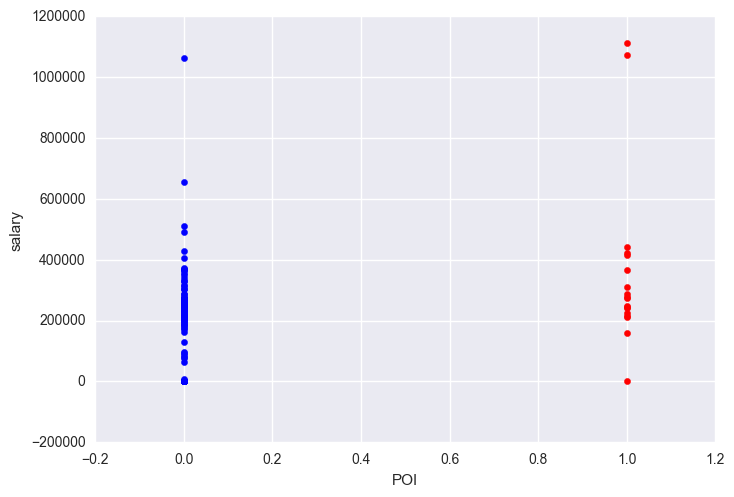

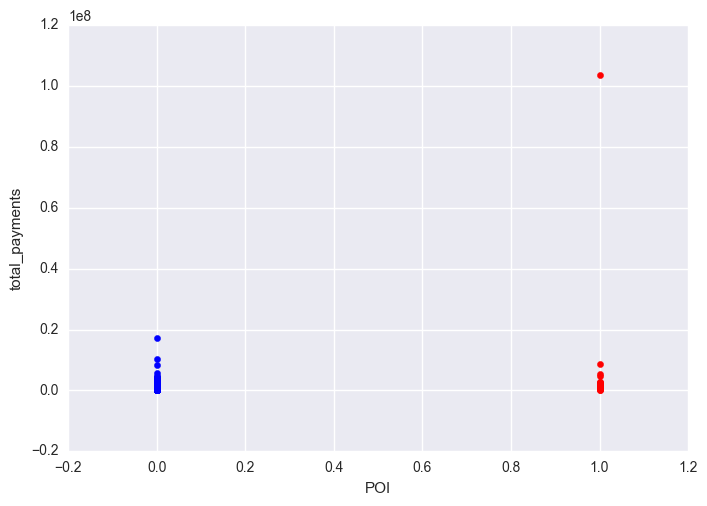

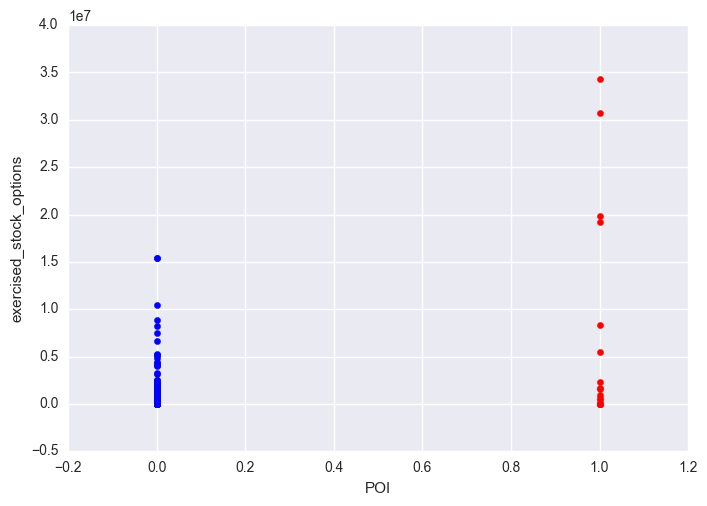

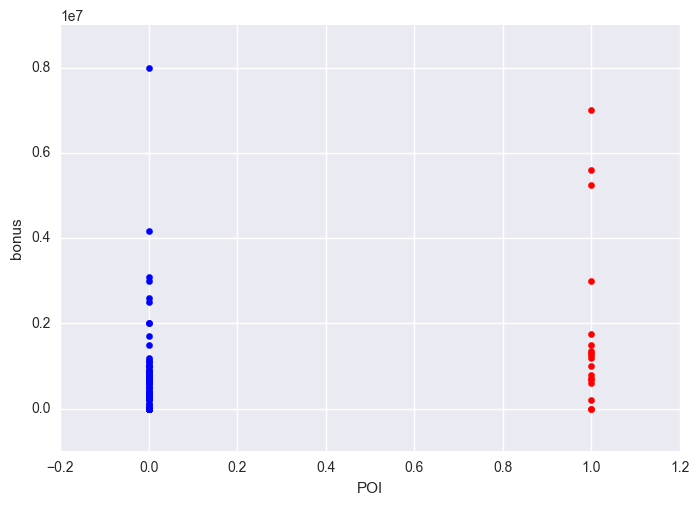

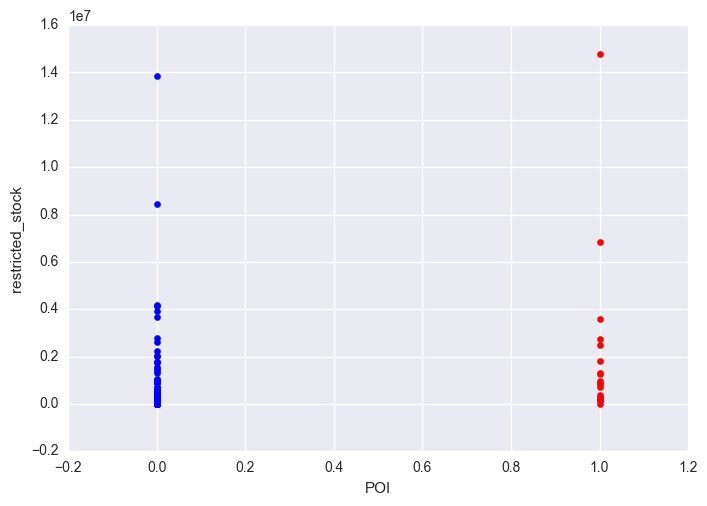

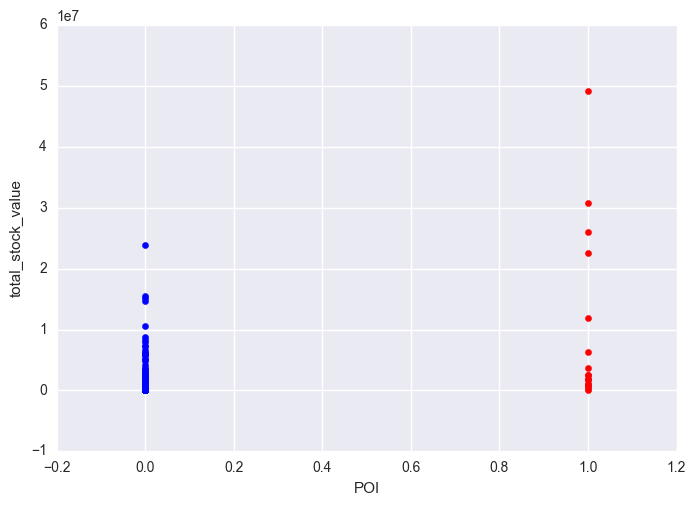

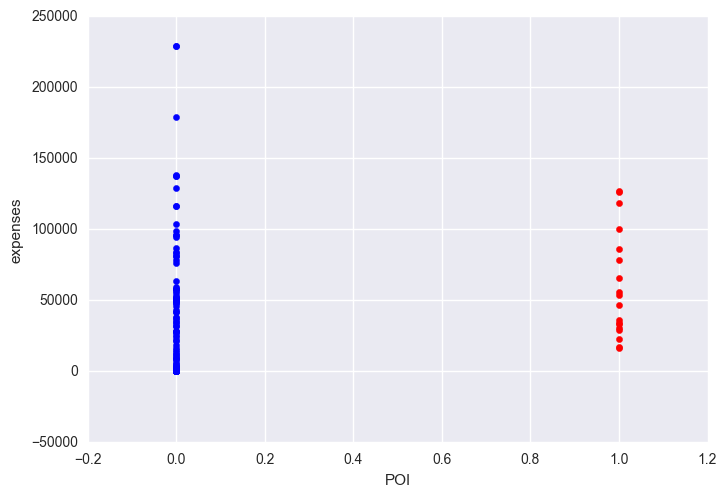

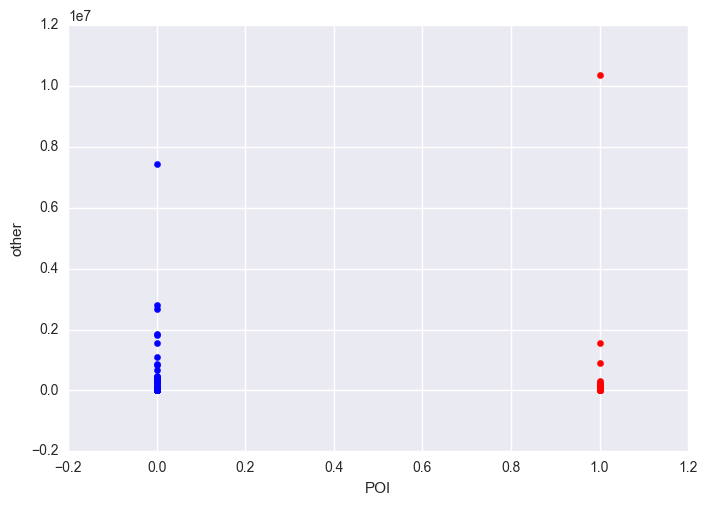

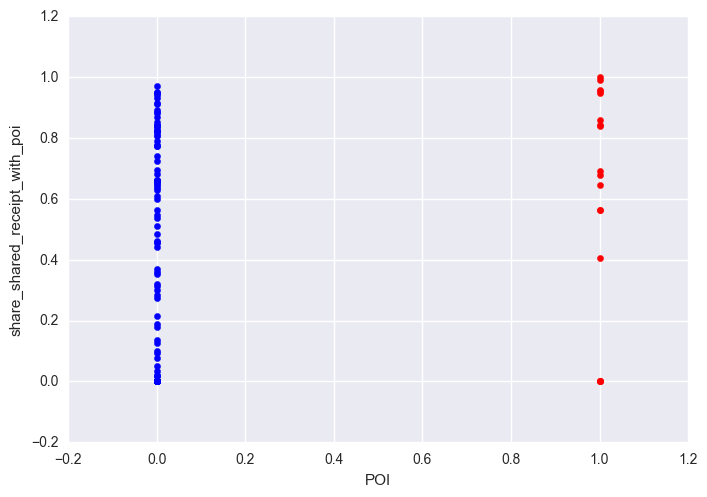

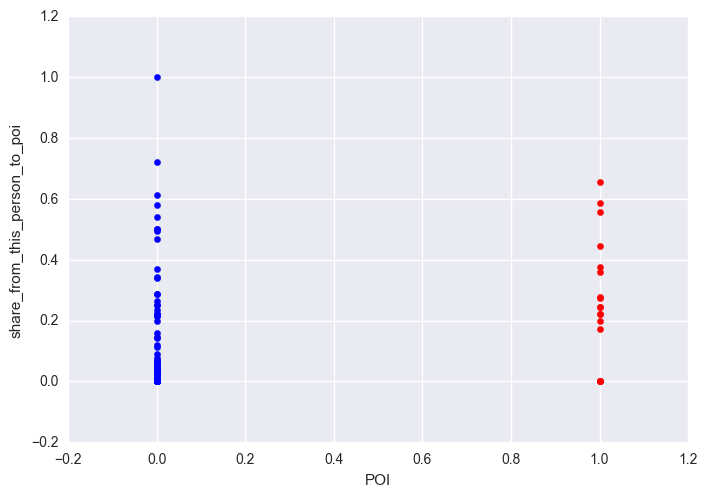

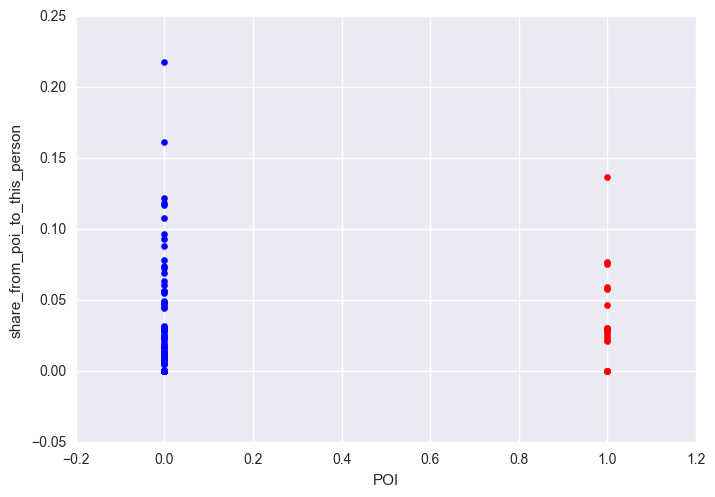

In [35]:
import matplotlib.pyplot as plt
import seaborn as sb

for i in range(1,len(initial_selection_features)):

    for point in data:
        if point[0]==1:
            plt.scatter(point[0], point[i], color = "r")
        else:
            plt.scatter(point[0], point[i], color = "b")

    plt.xlabel('POI')
    plt.ylabel(initial_selection_features[i])
    plt
    plt.show()



I notice that *total_payments* has clear outlier. I investigate who it is

In [36]:
start = 0
suspect = ""
for person in enron_data.keys():
    if  enron_data[person]['total_payments']!= "NaN" and enron_data[person]['total_payments'] > start:
        suspect =  person
        start = enron_data[person]['total_payments']

print suspect
print start


LAY KENNETH L
103559793


# Classifier
Prepare data for classification and testing. I will test performance using the *tester.py* file provided by Udacity.

In [37]:
from tester import test_classifier

C:\Users\marcelot\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Create 4 initial classifiers

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


# Naive Bayes
clf_NB = GaussianNB()

# SVM
clf_SVM = SVC()

# Decision Tree
clf_TREE = DecisionTreeClassifier()

# AdaBoost:
clf_ADA = AdaBoostClassifier()



## Compare initial performance

In [39]:
test_classifier(clf_NB, enron_data, initial_selection_features)
test_classifier(clf_SVM, enron_data, initial_selection_features)
test_classifier(clf_TREE, enron_data, initial_selection_features)
test_classifier(clf_ADA, enron_data, initial_selection_features)


GaussianNB(priors=None)
	Accuracy: 0.84627	Precision: 0.37271	Recall: 0.22400	F1: 0.27983	F2: 0.24343
	Total predictions: 15000	True positives:  448	False positives:  754	False negatives: 1552	True negatives: 12246

Got a divide by zero when trying out: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Precision or recall may be undefined due to a lack of true positive predicitons.
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.80593	Precision: 0.29019	Recall: 0.31500	F1: 0.30209	F2: 0.30970
	Total predictions: 15000	True positives:  630	Fals

AdaBoost has the best performance, so we go further only with it.

Check the feature importances importances on the training set

In [40]:
clf_ADA.fit(features_train,labels_train)
for feature, imp in zip(initial_selection_features[1:],clf_ADA.feature_importances_):
    print feature +": " + str(round(imp,2))

salary: 0.2
total_payments: 0.18
exercised_stock_options: 0.12
bonus: 0.16
restricted_stock: 0.1
total_stock_value: 0.04
expenses: 0.08
other: 0.02
share_shared_receipt_with_poi: 0.04
share_from_this_person_to_poi: 0.02
share_from_poi_to_this_person: 0.04


Tune this model, optimizing F1

In [41]:
from sklearn.model_selection import GridSearchCV
parameters = {'learning_rate':[0.1, 0.2, 0.3, 0.5, 0.7,0.8, 0.9, 1, 2,3, 5, 10],'n_estimators':[1,5,8,10,11, 12, 13, 14, 15, 16, 17, 18,50,100,1000, 2000] }
clf_ADA = AdaBoostClassifier()
clf = GridSearchCV(clf_ADA, parameters, scoring = 'f1', cv = 10 )
clf.fit(features, labels)

C:\Users\marcelot\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 50, 100, 1000, 2000], 'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 1, 2, 3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [42]:
print clf.best_params_
print clf.best_score_ 

{'n_estimators': 16, 'learning_rate': 0.9}
0.551282051282


Double check performance of the best model, and obtain the other metrics:

In [43]:
lr = 0.9
n_est = 16
clf_ADA = AdaBoostClassifier(learning_rate = lr, n_estimators = n_est)
test_classifier(clf_ADA, enron_data, initial_selection_features)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.9, n_estimators=16, random_state=None)
	Accuracy: 0.87300	Precision: 0.53251	Recall: 0.38900	F1: 0.44958	F2: 0.41116
	Total predictions: 15000	True positives:  778	False positives:  683	False negatives: 1222	True negatives: 12317



Check the feature importances importances on the training set

In [44]:
clf_ADA.fit(features_train,labels_train)
for feature, imp in zip(initial_selection_features[1:],clf_ADA.feature_importances_):
    print feature +": " + str(round(imp,2))

salary: 0.13
total_payments: 0.19
exercised_stock_options: 0.13
bonus: 0.25
restricted_stock: 0.13
total_stock_value: 0.0
expenses: 0.06
other: 0.06
share_shared_receipt_with_poi: 0.06
share_from_this_person_to_poi: 0.0
share_from_poi_to_this_person: 0.0


Let's see how the performance compares if we drop the features with 0 importance:

In [45]:
second_selection_features = initial_selection_features

In [46]:
second_selection_features.remove('share_from_this_person_to_poi')
second_selection_features.remove('share_from_poi_to_this_person')
second_selection_features.remove('total_stock_value')

In [47]:
print  second_selection_features
print "\n Numbers of features: " + str(len(second_selection_features))

['poi', 'salary', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'expenses', 'other', 'share_shared_receipt_with_poi']

 Numbers of features: 9


Re-create relevant variables

In [48]:
data = featureFormat(enron_data, second_selection_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

and test performance

In [49]:
test_classifier(clf_ADA, enron_data, second_selection_features)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.9, n_estimators=16, random_state=None)
	Accuracy: 0.87247	Precision: 0.52921	Recall: 0.39400	F1: 0.45171	F2: 0.41522
	Total predictions: 15000	True positives:  788	False positives:  701	False negatives: 1212	True negatives: 12299



In [50]:
clf_ADA.fit(features_train,labels_train)
for feature, imp in zip(second_selection_features[1:],clf_ADA.feature_importances_):
    print feature +": " + str(round(imp,2))

salary: 0.13
total_payments: 0.19
exercised_stock_options: 0.13
bonus: 0.25
restricted_stock: 0.13
expenses: 0.06
other: 0.06
share_shared_receipt_with_poi: 0.06


The performance is roughly the same, with slightly better *Recall* and *F1*. 

Let's double check the tuning.

In [51]:
clf_ADA = AdaBoostClassifier()
clf = GridSearchCV(clf_ADA, parameters, scoring = 'f1', cv = 10 )
clf.fit(features, labels)

GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 50, 100, 1000, 2000], 'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 1, 2, 3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [52]:
print clf.best_params_
print clf.best_score_ 

{'n_estimators': 11, 'learning_rate': 0.5}
0.428904428904


Double check performance of the best model, and obtain the other metrics:

In [53]:
lr = 0.5
n_est = 11
clf_ADA = AdaBoostClassifier(learning_rate = lr, n_estimators = n_est)
test_classifier(clf_ADA, enron_data, second_selection_features)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=11, random_state=None)
	Accuracy: 0.88767	Precision: 0.63496	Recall: 0.37050	F1: 0.46795	F2: 0.40417
	Total predictions: 15000	True positives:  741	False positives:  426	False negatives: 1259	True negatives: 12574



There is a clear improvement, particularly in Precision. Let's check the importance.

In [54]:
clf_ADA.fit(features_train,labels_train)
for feature, imp in zip(second_selection_features[1:],clf_ADA.feature_importances_):
    print feature +": " + str(round(imp,2))

salary: 0.0
total_payments: 0.09
exercised_stock_options: 0.18
bonus: 0.27
restricted_stock: 0.27
expenses: 0.09
other: 0.0
share_shared_receipt_with_poi: 0.09


Let's see how the performance compares if we drop the features with 0 importance:

In [55]:
third_selection_features = second_selection_features

In [56]:
third_selection_features.remove('other')

In [57]:
print  third_selection_features
print "\n Numbers of features: " + str(len(third_selection_features))

['poi', 'salary', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'expenses', 'share_shared_receipt_with_poi']

 Numbers of features: 8


Re-create relevant variables

In [58]:
data = featureFormat(enron_data, third_selection_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

and test performance

In [59]:
test_classifier(clf_ADA, enron_data, third_selection_features)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=11, random_state=None)
	Accuracy: 0.89007	Precision: 0.66924	Recall: 0.34700	F1: 0.45703	F2: 0.38398
	Total predictions: 15000	True positives:  694	False positives:  343	False negatives: 1306	True negatives: 12657



Performance is slightly improved in *Precision* but drops in *Recall* and *F1*.

We stop this investigation and stick with the *second_selection_features* list, with the *learning rate* = 0.5 and *n_estimators* = 11.

# Alternative Feature Selection

In this case I will start with the full list of features including the created festures, and use recursive feature elimination (RFE) to select the 8 best features from the full list and compare performance the performance against my manually selected features. I'll start the RFE using the tuned parameters from above.

In [60]:
from sklearn.feature_selection import RFE

In [61]:
data = featureFormat(enron_data, all_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [62]:
rfe = RFE(clf_ADA,8)
selector = rfe.fit(features,labels)

In [63]:
for feature, rank in zip(all_features[1:], selector.ranking_ ):
    print feature +" (" + str(rank) +")"

salary (15)
to_messages (14)
deferral_payments (13)
total_payments (1)
exercised_stock_options (1)
bonus (1)
restricted_stock (1)
shared_receipt_with_poi (9)
restricted_stock_deferred (8)
total_stock_value (7)
expenses (1)
loan_advances (11)
from_messages (12)
other (1)
from_this_person_to_poi (6)
director_fees (5)
deferred_income (4)
long_term_incentive (3)
from_poi_to_this_person (2)
share_shared_receipt_with_poi (1)
share_from_this_person_to_poi (1)
share_from_poi_to_this_person (10)


In [64]:
alternative_selection_features = ['poi']
for feature, rank in zip(all_features[1:], selector.ranking_ ):
    if rank == 1:
        alternative_selection_features.append(feature)

In [65]:
print  alternative_selection_features
print "\n Numbers of features: " + str(len(alternative_selection_features))

['poi', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'expenses', 'other', 'share_shared_receipt_with_poi', 'share_from_this_person_to_poi']

 Numbers of features: 9


Re-create relevant variables

In [66]:
data = featureFormat(enron_data, alternative_selection_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

and test performance

In [67]:
test_classifier(clf_ADA, enron_data, alternative_selection_features)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=11, random_state=None)
	Accuracy: 0.88933	Precision: 0.64912	Recall: 0.37000	F1: 0.47134	F2: 0.40481
	Total predictions: 15000	True positives:  740	False positives:  400	False negatives: 1260	True negatives: 12600



We notice an increase in performance, particularly in *Recall* and *F1*, therefore we proceed in this path. Let's check the importance of features.

In [68]:
clf_ADA.fit(features_train,labels_train)
for feature, imp in zip(alternative_selection_features[1:],clf_ADA.feature_importances_):
    print feature +": " + str(round(imp,2))

total_payments: 0.09
exercised_stock_options: 0.18
bonus: 0.27
restricted_stock: 0.27
expenses: 0.09
other: 0.0
share_shared_receipt_with_poi: 0.09
share_from_this_person_to_poi: 0.0


Since there are features with close to 0 importance, we investigate if we can drop features.

In [69]:
data = featureFormat(enron_data, all_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

rfe = RFE(clf_ADA,6)
selector = rfe.fit(features,labels)

In [70]:
for feature, rank in zip(all_features[1:], selector.ranking_ ):
    print feature +" (" + str(rank) +")"

salary (17)
to_messages (16)
deferral_payments (15)
total_payments (3)
exercised_stock_options (1)
bonus (1)
restricted_stock (2)
shared_receipt_with_poi (11)
restricted_stock_deferred (10)
total_stock_value (9)
expenses (1)
loan_advances (13)
from_messages (14)
other (1)
from_this_person_to_poi (8)
director_fees (7)
deferred_income (6)
long_term_incentive (5)
from_poi_to_this_person (4)
share_shared_receipt_with_poi (1)
share_from_this_person_to_poi (1)
share_from_poi_to_this_person (12)


In [71]:
second_alternative_selection_features = ['poi']
for feature, rank in zip(all_features[1:], selector.ranking_ ):
    if rank == 1:
        second_alternative_selection_features.append(feature)

In [72]:
print  second_alternative_selection_features
print "\n Numbers of features: " + str(len(second_alternative_selection_features))

['poi', 'exercised_stock_options', 'bonus', 'expenses', 'other', 'share_shared_receipt_with_poi', 'share_from_this_person_to_poi']

 Numbers of features: 7


Re-create relevant variables

In [73]:
data = featureFormat(enron_data, second_alternative_selection_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)


and test performance

In [74]:
test_classifier(clf_ADA, enron_data, second_alternative_selection_features)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=11, random_state=None)
	Accuracy: 0.88943	Precision: 0.72027	Recall: 0.36950	F1: 0.48843	F2: 0.40937
	Total predictions: 14000	True positives:  739	False positives:  287	False negatives: 1261	True negatives: 11713



Performance is again improved, therefore we can investigate further. Let's see the importance again.

In [75]:
clf_ADA.fit(features_train,labels_train)
for feature, imp in zip(second_alternative_selection_features[1:],clf_ADA.feature_importances_):
    print feature +": " + str(round(imp,2))

exercised_stock_options: 0.27
bonus: 0.18
expenses: 0.18
other: 0.18
share_shared_receipt_with_poi: 0.0
share_from_this_person_to_poi: 0.18


There are still features with close to 0 importance. Let's see what happens if we drop an additional feature.

In [76]:
data = featureFormat(enron_data, all_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

rfe = RFE(clf_ADA,5)
selector = rfe.fit(features,labels)

In [77]:
for feature, rank in zip(all_features[1:], selector.ranking_ ):
    print feature +" (" + str(rank) +")"

salary (18)
to_messages (17)
deferral_payments (16)
total_payments (4)
exercised_stock_options (1)
bonus (1)
restricted_stock (3)
shared_receipt_with_poi (12)
restricted_stock_deferred (11)
total_stock_value (10)
expenses (2)
loan_advances (14)
from_messages (15)
other (1)
from_this_person_to_poi (9)
director_fees (8)
deferred_income (7)
long_term_incentive (6)
from_poi_to_this_person (5)
share_shared_receipt_with_poi (1)
share_from_this_person_to_poi (1)
share_from_poi_to_this_person (13)


In [78]:
third_alternative_selection_features = ['poi']
for feature, rank in zip(all_features[1:], selector.ranking_ ):
    if rank == 1:
        third_alternative_selection_features.append(feature)

In [79]:
print  third_alternative_selection_features
print "\n Numbers of features: " + str(len(third_alternative_selection_features))

['poi', 'exercised_stock_options', 'bonus', 'other', 'share_shared_receipt_with_poi', 'share_from_this_person_to_poi']

 Numbers of features: 6


Re-create relevant variables

In [80]:
data = featureFormat(enron_data, third_alternative_selection_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

and test performance

In [81]:
test_classifier(clf_ADA, enron_data, third_alternative_selection_features)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=11, random_state=None)
	Accuracy: 0.84331	Precision: 0.47919	Recall: 0.21300	F1: 0.29491	F2: 0.23962
	Total predictions: 13000	True positives:  426	False positives:  463	False negatives: 1574	True negatives: 10537



Performance is clearly reduced. Let's check the importance.

In [82]:
clf_ADA.fit(features_train,labels_train)
for feature, imp in zip(third_alternative_selection_features[1:],clf_ADA.feature_importances_):
    print feature +": " + str(round(imp,2))

exercised_stock_options: 0.18
bonus: 0.09
other: 0.36
share_shared_receipt_with_poi: 0.18
share_from_this_person_to_poi: 0.18


Final thing we can do is to manually remove the features with near 0 importance and compare performance.

In [83]:
forth_alternative_selection_features = second_alternative_selection_features
forth_alternative_selection_features.remove('share_shared_receipt_with_poi')

In [84]:
print  forth_alternative_selection_features
print "\n Numbers of features: " + str(len(forth_alternative_selection_features))

['poi', 'exercised_stock_options', 'bonus', 'expenses', 'other', 'share_from_this_person_to_poi']

 Numbers of features: 6


Re-create relevant variables

In [85]:
data = featureFormat(enron_data, forth_alternative_selection_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

and test performance

In [86]:
test_classifier(clf_ADA, enron_data, forth_alternative_selection_features)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=11, random_state=None)
	Accuracy: 0.86864	Precision: 0.57285	Recall: 0.31650	F1: 0.40773	F2: 0.34761
	Total predictions: 14000	True positives:  633	False positives:  472	False negatives: 1367	True negatives: 11528



Let's see the importance:

In [87]:
clf_ADA.fit(features_train,labels_train)
for feature, imp in zip(forth_alternative_selection_features[1:],clf_ADA.feature_importances_):
    print feature +": " + str(round(imp,2))

exercised_stock_options: 0.09
bonus: 0.18
expenses: 0.27
other: 0.27
share_from_this_person_to_poi: 0.18


So far, *second_alternative_selection_features* seems the best option.

## Best option

In [89]:
second_alternative_selection_features = ['poi', 'exercised_stock_options', 'bonus', 'expenses', 'other', 'share_shared_receipt_with_poi', 'share_from_this_person_to_poi']

print  second_alternative_selection_features
print "\n Numbers of features: " + str(len(second_alternative_selection_features))

['poi', 'exercised_stock_options', 'bonus', 'expenses', 'other', 'share_shared_receipt_with_poi', 'share_from_this_person_to_poi']

 Numbers of features: 7


### Double Check tune

In [90]:
data = featureFormat(enron_data, second_alternative_selection_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [91]:
clf_ADA = AdaBoostClassifier()
clf = GridSearchCV(clf_ADA, parameters, scoring = 'f1', cv = 10 )
clf.fit(features, labels)

GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 50, 100, 1000, 2000], 'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 1, 2, 3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [92]:
print clf.best_params_
print clf.best_score_ 

{'n_estimators': 13, 'learning_rate': 2}
0.500241545894


Double check performance with the optimal parameters

In [93]:
lr = 2
n_est = 13
clf_ADA = AdaBoostClassifier(learning_rate = lr, n_estimators = n_est)
test_classifier(clf_ADA, enron_data, second_alternative_selection_features)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=2,
          n_estimators=13, random_state=None)
	Accuracy: 0.87736	Precision: 0.58408	Recall: 0.49150	F1: 0.53380	F2: 0.50759
	Total predictions: 14000	True positives:  983	False positives:  700	False negatives: 1017	True negatives: 11300



and the importance of features:

In [101]:
clf_ADA.fit(features_train,labels_train)
for feature, imp in zip(second_alternative_selection_features[1:],clf_ADA.feature_importances_):
    print feature +": " + str(imp)

exercised_stock_options: 0.692307692308
bonus: 0.230769230769
expenses: 0.0769230769231
other: 0.0
share_shared_receipt_with_poi: 0.0
share_from_this_person_to_poi: 0.0


Let's see what happens if we drop the features with near 0 importance

In [102]:
final_selection_features = ['poi', 'exercised_stock_options', 'bonus', 'expenses']

print  final_selection_features
print "\n Numbers of features: " + str(len(final_selection_features))

['poi', 'exercised_stock_options', 'bonus', 'expenses']

 Numbers of features: 4


In [103]:
data = featureFormat(enron_data, final_selection_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [105]:
clf_ADA = AdaBoostClassifier(learning_rate = lr, n_estimators = n_est)
test_classifier(clf_ADA, enron_data, final_selection_features)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=2,
          n_estimators=13, random_state=None)
	Accuracy: 0.85129	Precision: 0.46645	Recall: 0.28500	F1: 0.35382	F2: 0.30904
	Total predictions: 14000	True positives:  570	False positives:  652	False negatives: 1430	True negatives: 11348



Clearly not an improvement

## Impact of created features

In order to access the impact of the created features, we compare the performance of the classifier with and without it.

In [111]:
data = featureFormat(enron_data, second_alternative_selection_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

print  second_alternative_selection_features
print "\n Numbers of features: " + str(len(second_alternative_selection_features))

lr = 2
n_est = 13
clf_ADA = AdaBoostClassifier(learning_rate = lr, n_estimators = n_est)
test_classifier(clf_ADA, enron_data, second_alternative_selection_features)

['poi', 'exercised_stock_options', 'bonus', 'expenses', 'other', 'share_shared_receipt_with_poi', 'share_from_this_person_to_poi']

 Numbers of features: 7
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=2,
          n_estimators=13, random_state=None)
	Accuracy: 0.87700	Precision: 0.58264	Recall: 0.49000	F1: 0.53232	F2: 0.50609
	Total predictions: 14000	True positives:  980	False positives:  702	False negatives: 1020	True negatives: 11298



In [112]:
clf_ADA.fit(features_train,labels_train)
for feature, imp in zip(second_alternative_selection_features[1:],clf_ADA.feature_importances_):
    print feature +": " + str(round(imp,2))

exercised_stock_options: 0.69
bonus: 0.23
expenses: 0.08
other: 0.0
share_shared_receipt_with_poi: 0.0
share_from_this_person_to_poi: 0.0


In [108]:
second_alternative_selection_features_without = ['poi', 'exercised_stock_options', 'bonus', 'expenses', 'other']
print  second_alternative_selection_features_without
print "\n Numbers of features: " + str(len(second_alternative_selection_features_without))

lr = 2
n_est = 13
clf_ADA = AdaBoostClassifier(learning_rate = lr, n_estimators = n_est)
test_classifier(clf_ADA, enron_data, second_alternative_selection_features_without)

['poi', 'exercised_stock_options', 'bonus', 'expenses', 'other']

 Numbers of features: 5
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=2,
          n_estimators=13, random_state=None)
	Accuracy: 0.85186	Precision: 0.47068	Recall: 0.29700	F1: 0.36419	F2: 0.32067
	Total predictions: 14000	True positives:  594	False positives:  668	False negatives: 1406	True negatives: 11332

